In [16]:
import os
import uuid
import numpy as np 
import pandas as pd
#import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
# This is used in order to show the plotted figures within this notebook
%matplotlib inline 
# This is used in order to show the tensorboard within this notebook             
#%load_ext tensorboard  
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from collections import Counter


import missingno as msno


In [17]:
accounts = pd.read_csv('data/account.csv', sep=';')
cards_dev = pd.read_csv('data/card_dev.csv', sep=';')
clients = pd.read_csv('data/client.csv', sep=';')
disp = pd.read_csv('data/disp.csv', sep=';')
districts = pd.read_csv('data/district.csv', sep=';')
loans_dev = pd.read_csv('data/loan_dev.csv', sep=';')
trans_dev = pd.read_csv('data/trans_dev.csv', sep=';')

C:\Users\up201905348\AppData\Local\Temp\ipykernel_11384\1239521831.py:7: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  trans_dev = pd.read_csv('data/trans_dev.csv', sep=';')


In [18]:
accounts.head()

# categorize/encode frequency, no order
# parse date
# join on acc_id and distr_id

,account_id,district_id,frequency,date
0,576,55,monthly issuance,930101
1,3818,74,monthly issuance,930101
2,704,55,monthly issuance,930101
3,2378,16,monthly issuance,930101
4,2632,24,monthly issuance,930102


In [19]:
accounts.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   account_id   4500 non-null   int64 
 1   district_id  4500 non-null   int64 
 2   frequency    4500 non-null   object
 3   date         4500 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 140.8+ KB


<AxesSubplot: >

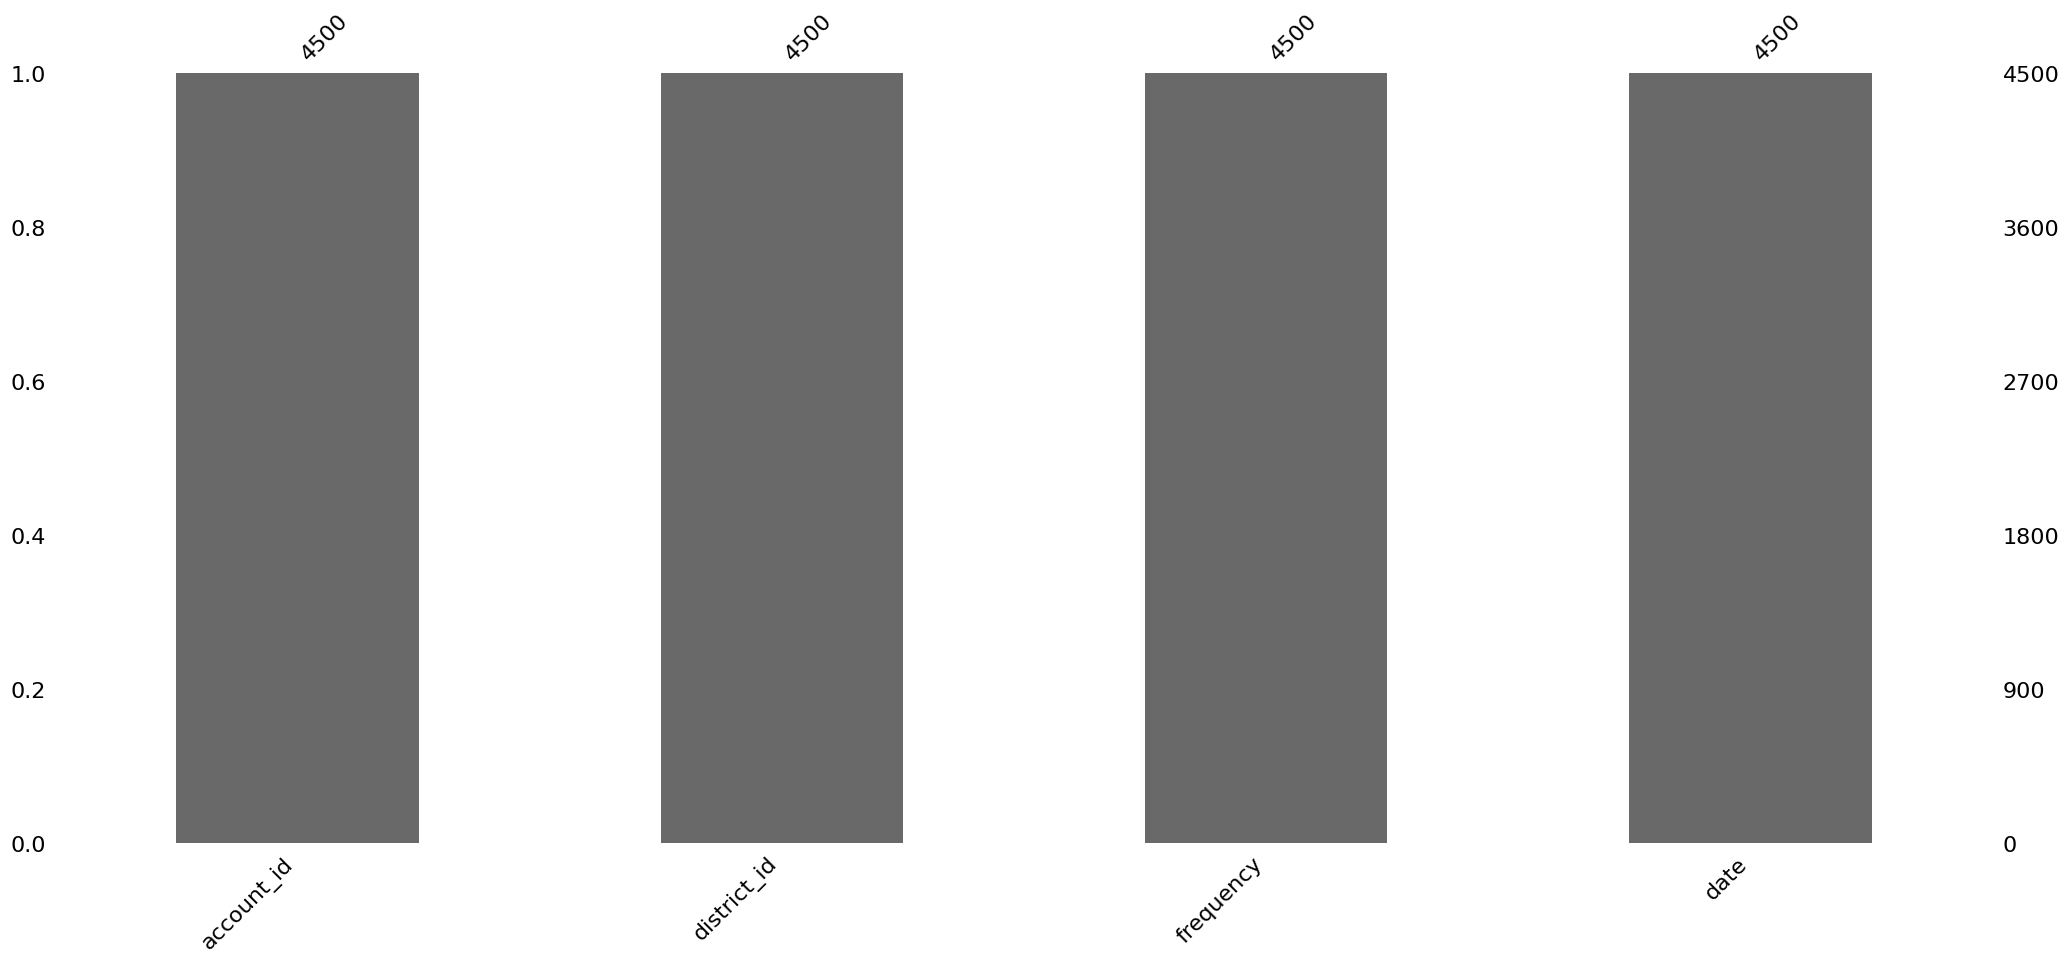

In [20]:
msno.bar(accounts)

<AxesSubplot: >

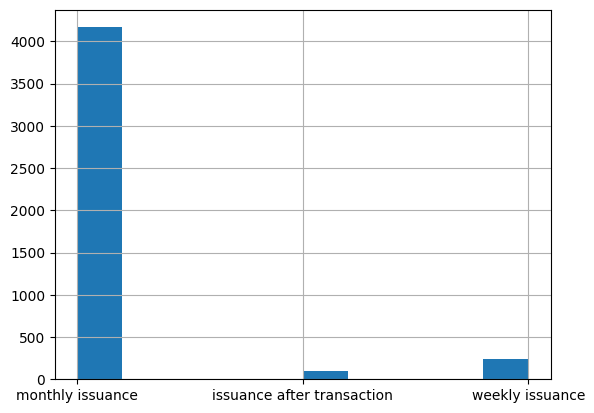

In [21]:
accounts['frequency'].hist()

In [22]:
cards_dev.nunique()
# encode type, ordered
# parse issued

card_id    177
disp_id    177
type         3
issued     162
dtype: int64

## Information Retrieved
1 to 1 association between card and disposition, can collapse into single column

In [23]:
cards_dev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   card_id  177 non-null    int64 
 1   disp_id  177 non-null    int64 
 2   type     177 non-null    object
 3   issued   177 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 5.7+ KB


<AxesSubplot: >

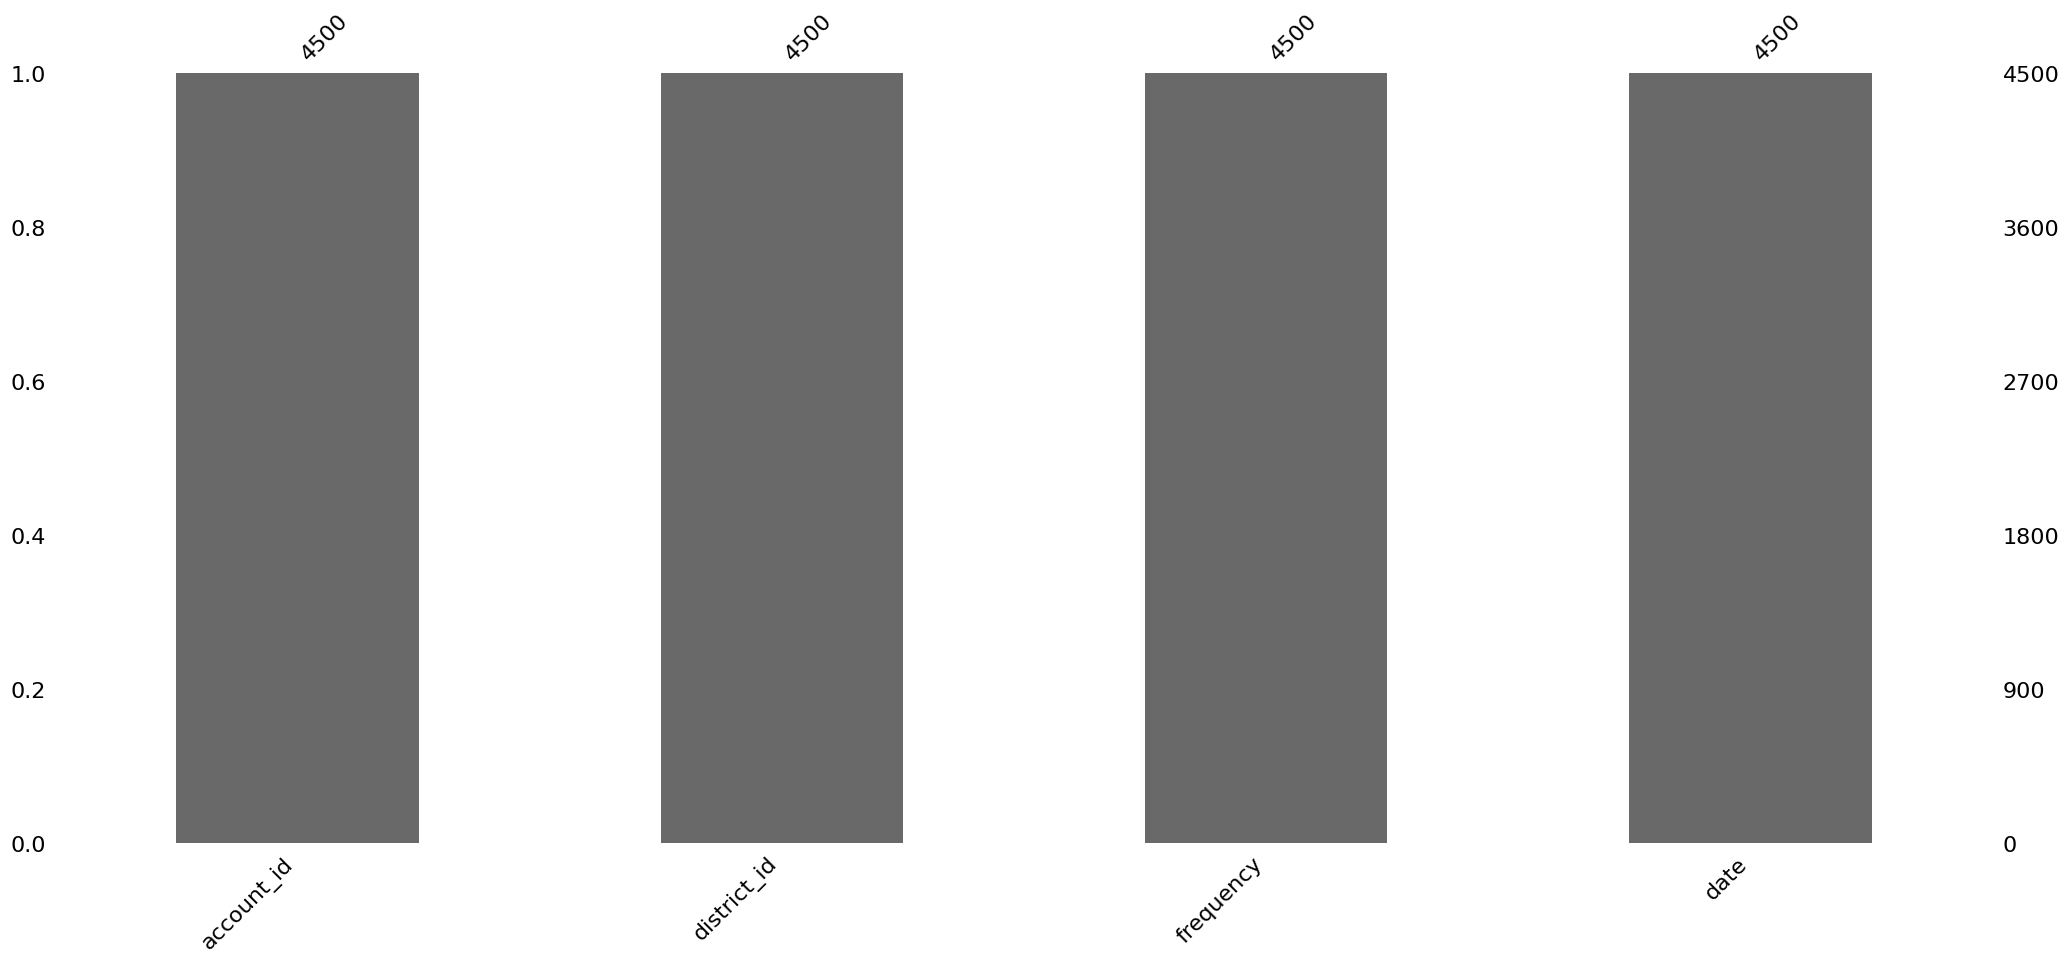

In [24]:
msno.bar(accounts)

<AxesSubplot: >

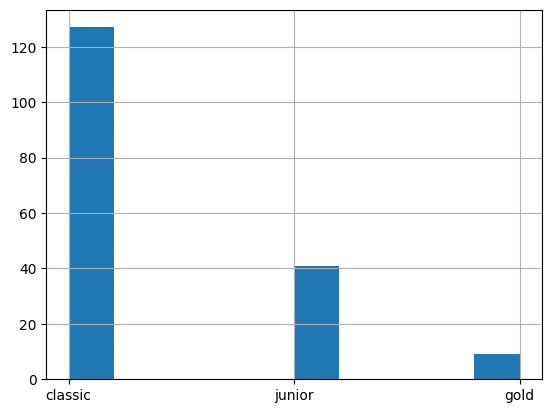

In [25]:
cards_dev['type'].hist()

In [26]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="dark")

# Simulate data from a bivariate Gaussian
for x in 

# Draw a combo histogram and scatterplot with density contours
f, ax = plt.subplots(figsize=(6, 6))
sns.scatterplot(x=x, y=y, s=5, color=".15")
sns.histplot(x=x, y=y, bins=50, pthresh=.1, cmap="mako")
sns.kdeplot(x=x, y=y, levels=5, color="w", linewidths=1)

SyntaxError: invalid syntax (3827249642.py, line 7)

<AxesSubplot:>

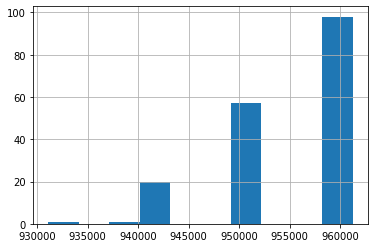

In [ ]:
cards_dev['issued'].hist()

In [ ]:
clients.head()

# parse birth date
# retrieve sex from birth_number

,client_id,birth_number,district_id
0,1,706213,18
1,2,450204,1
2,3,406009,1
3,4,561201,5
4,5,605703,5


In [ ]:
clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5369 entries, 0 to 5368
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   client_id     5369 non-null   int64
 1   birth_number  5369 non-null   int64
 2   district_id   5369 non-null   int64
dtypes: int64(3)
memory usage: 126.0 KB


<AxesSubplot:>

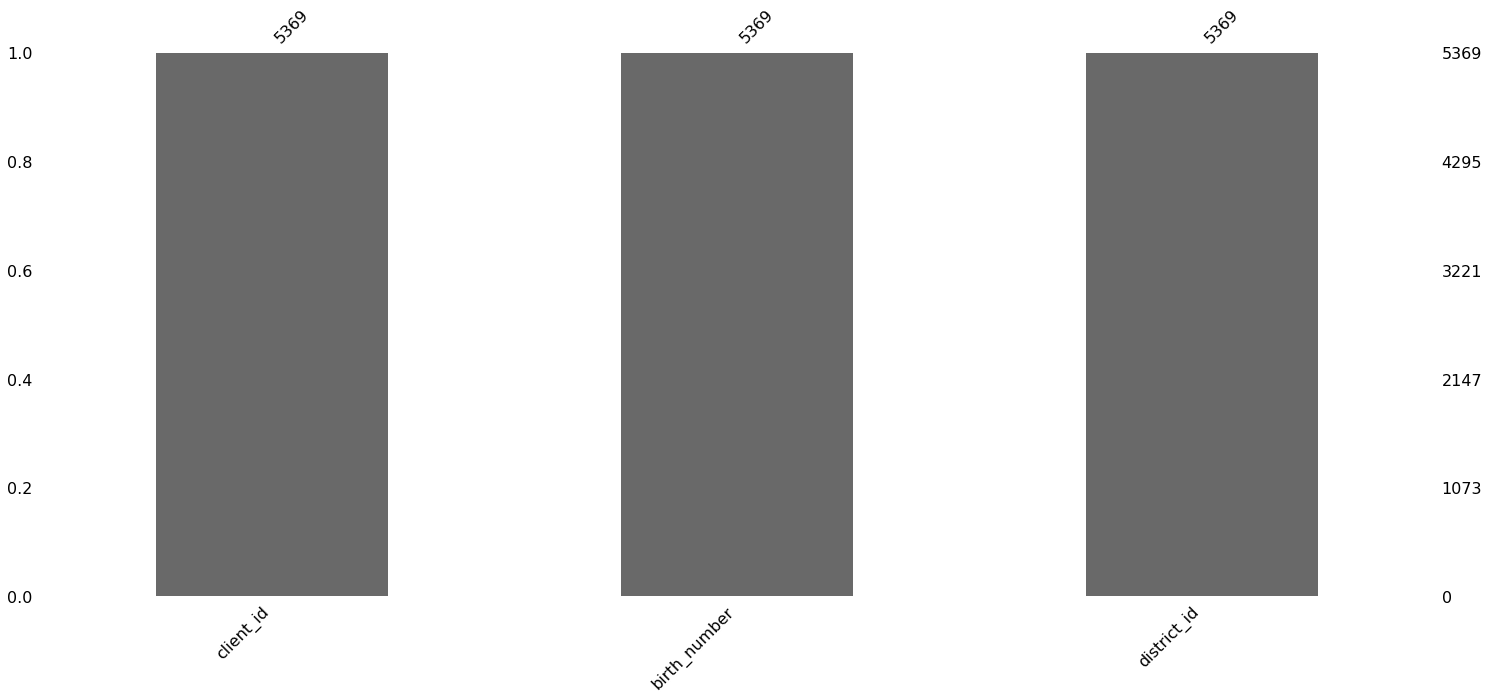

In [ ]:
msno.bar(clients)

In [ ]:
disp.head()

# encode type

,disp_id,client_id,account_id,type
0,1,1,1,OWNER
1,2,2,2,OWNER
2,3,3,2,DISPONENT
3,4,4,3,OWNER
4,5,5,3,DISPONENT


In [ ]:
disp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5369 entries, 0 to 5368
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   disp_id     5369 non-null   int64 
 1   client_id   5369 non-null   int64 
 2   account_id  5369 non-null   int64 
 3   type        5369 non-null   object
dtypes: int64(3), object(1)
memory usage: 167.9+ KB


<AxesSubplot:>

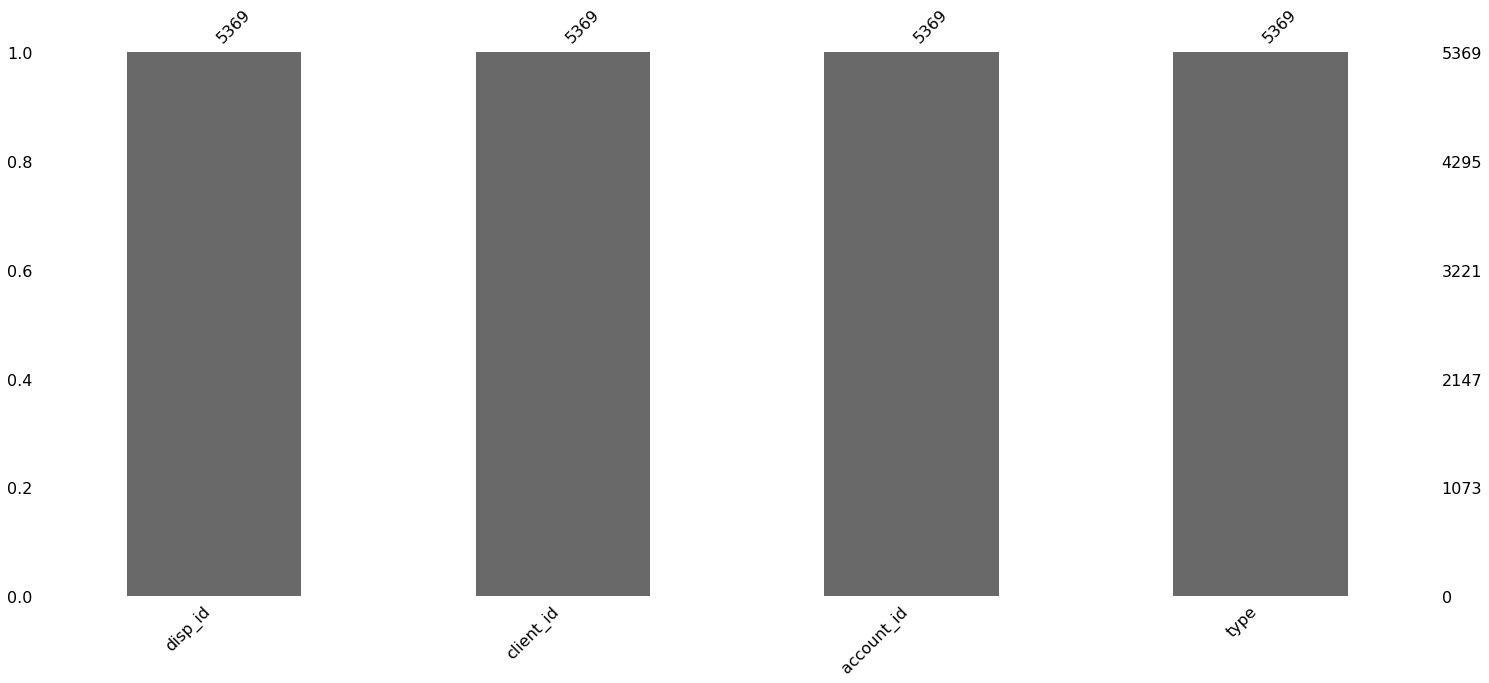

In [ ]:
msno.bar(disp)

<AxesSubplot:>

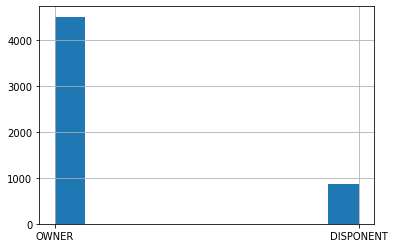

In [ ]:
disp['type'].hist()

In [ ]:
districts.head()
# encode name, region
# normalize no municipalities, no cities, conver to 0-1 scale urban inhabitants, no entrepreneurs
# add crimes per capita

,code,name,region,no. of inhabitants,no. of municipalities with inhabitants < 499,no. of municipalities with inhabitants 500-1999,no. of municipalities with inhabitants 2000-9999,no. of municipalities with inhabitants >10000,no. of cities,ratio of urban inhabitants,average salary,unemploymant rate '95,unemploymant rate '96,no. of enterpreneurs per 1000 inhabitants,no. of commited crimes '95,no. of commited crimes '96
0,1,Hl.m. Praha,Prague,1204953,0,0,0,1,1,100.0,12541,0.29,0.43,167,85677,99107
1,2,Benesov,central Bohemia,88884,80,26,6,2,5,46.7,8507,1.67,1.85,132,2159,2674
2,3,Beroun,central Bohemia,75232,55,26,4,1,5,41.7,8980,1.95,2.21,111,2824,2813
3,4,Kladno,central Bohemia,149893,63,29,6,2,6,67.4,9753,4.64,5.05,109,5244,5892
4,5,Kolin,central Bohemia,95616,65,30,4,1,6,51.4,9307,3.85,4.43,118,2616,3040


In [ ]:
districts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   code                                               77 non-null     int64  
 1   name                                               77 non-null     object 
 2   region                                             77 non-null     object 
 3   no. of inhabitants                                 77 non-null     int64  
 4   no. of municipalities with inhabitants < 499       77 non-null     int64  
 5   no. of municipalities with inhabitants 500-1999    77 non-null     int64  
 6   no. of municipalities with inhabitants 2000-9999   77 non-null     int64  
 7   no. of municipalities with inhabitants >10000      77 non-null     int64  
 8   no. of cities                                      77 non-null     int64  
 9   ratio of urb

<AxesSubplot:>

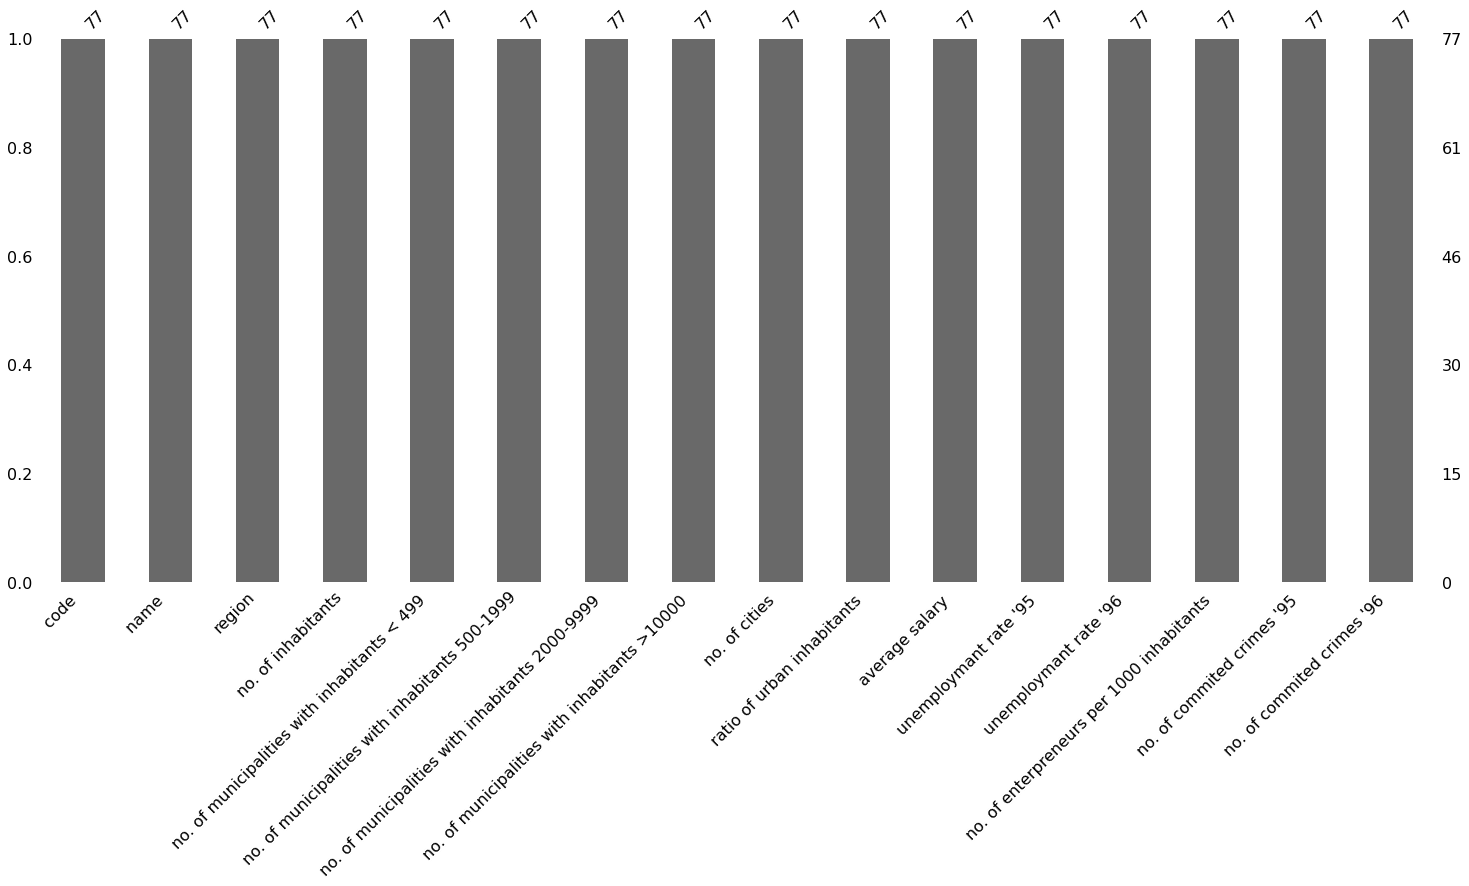

In [ ]:
msno.bar(districts)

In [ ]:
districts['region'].unique()

array(['Prague', 'central Bohemia', 'south Bohemia', 'west Bohemia',
       'north Bohemia', 'east Bohemia', 'south Moravia', 'north Moravia'],
      dtype=object)

<AxesSubplot:xlabel='region', ylabel='Count'>

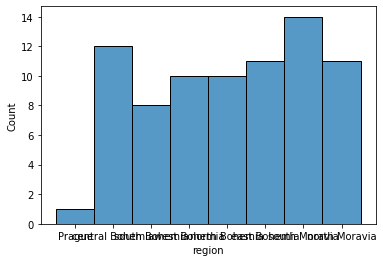

In [ ]:
sns.histplot(districts, x='region')


In [ ]:
loans_dev.head()

# parse date
# binarize status
# encode duration by year (is by month atm)
# normalize amount

,loan_id,account_id,date,amount,duration,payments,status
0,5314,1787,930705,96396,12,8033,-1
1,5316,1801,930711,165960,36,4610,1
2,6863,9188,930728,127080,60,2118,1
3,5325,1843,930803,105804,36,2939,1
4,7240,11013,930906,274740,60,4579,1


In [ ]:
loans_dev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 328 entries, 0 to 327
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   loan_id     328 non-null    int64
 1   account_id  328 non-null    int64
 2   date        328 non-null    int64
 3   amount      328 non-null    int64
 4   duration    328 non-null    int64
 5   payments    328 non-null    int64
 6   status      328 non-null    int64
dtypes: int64(7)
memory usage: 18.1 KB


<AxesSubplot:>

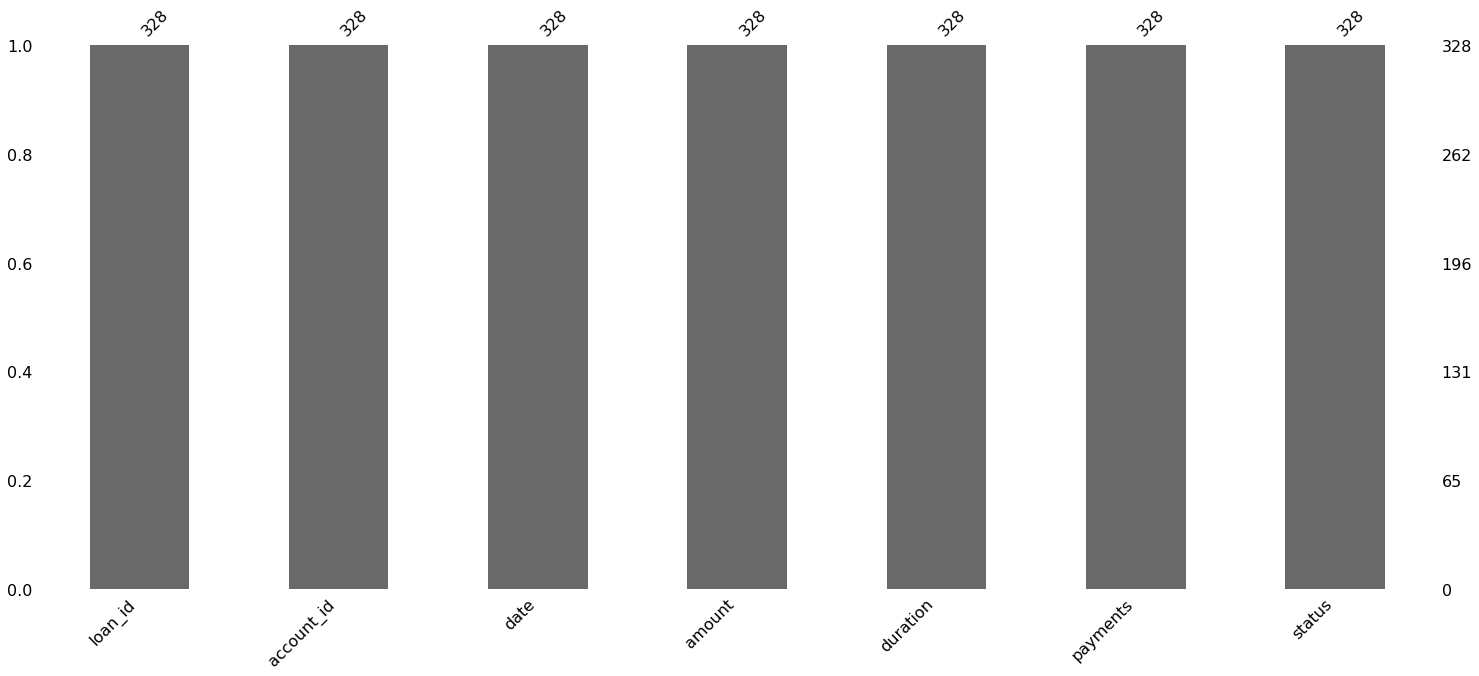

In [ ]:
msno.bar(loans_dev)

In [ ]:
trans_dev.head()

# parse date
# encode type, operation, bank
# handle nones on k_symbol and bank

,trans_id,account_id,date,type,operation,amount,balance,k_symbol,bank,account
0,1548749,5270,930113,credit,credit in cash,800.0,800.0,NaN,NaN,NaN
1,1548750,5270,930114,credit,collection from another bank,44749.0,45549.0,NaN,IJ,80269753.0
2,3393738,11265,930114,credit,credit in cash,1000.0,1000.0,NaN,NaN,NaN
3,3122924,10364,930117,credit,credit in cash,1100.0,1100.0,NaN,NaN,NaN
4,1121963,3834,930119,credit,credit in cash,700.0,700.0,NaN,NaN,NaN


In [ ]:
trans_dev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396685 entries, 0 to 396684
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   trans_id    396685 non-null  int64  
 1   account_id  396685 non-null  int64  
 2   date        396685 non-null  int64  
 3   type        396685 non-null  object 
 4   operation   325924 non-null  object 
 5   amount      396685 non-null  float64
 6   balance     396685 non-null  float64
 7   k_symbol    211441 non-null  object 
 8   bank        97242 non-null   object 
 9   account     102229 non-null  float64
dtypes: float64(3), int64(3), object(4)
memory usage: 30.3+ MB


<AxesSubplot:>

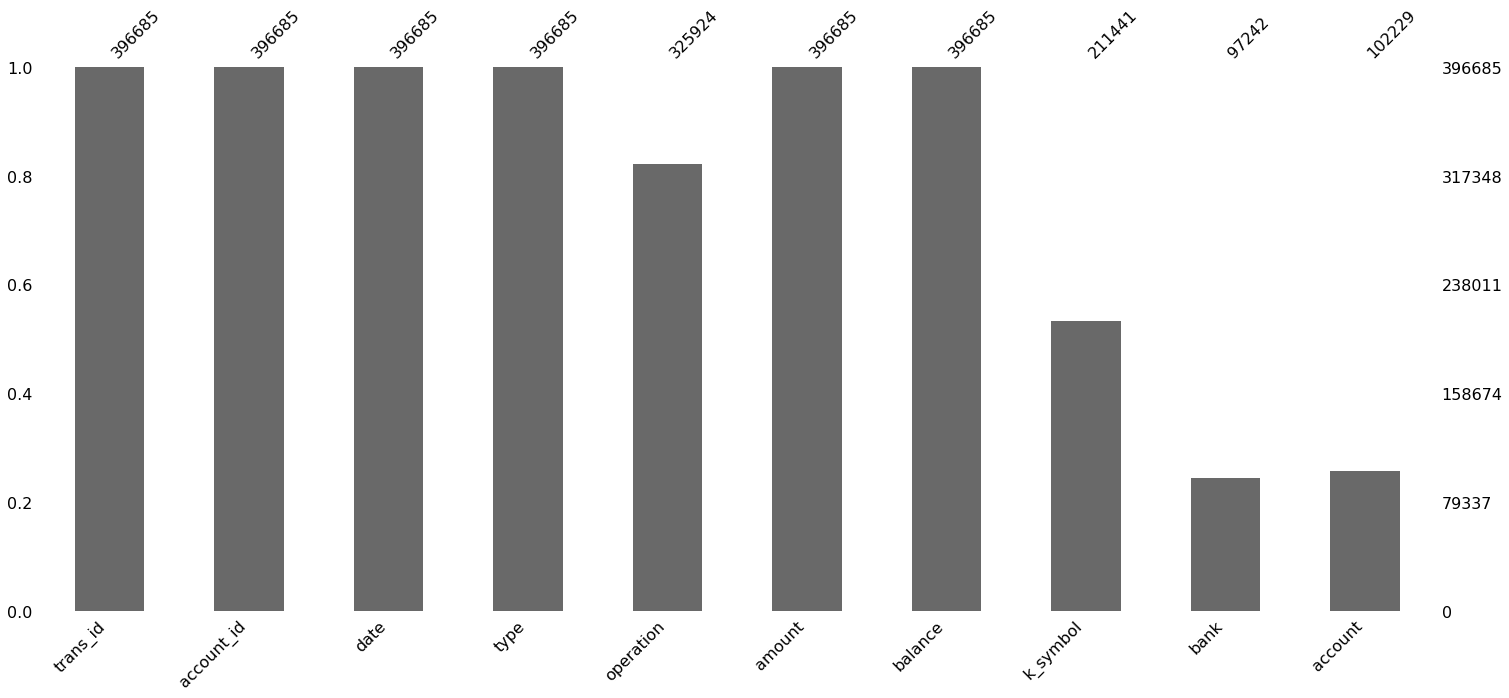

In [ ]:
msno.bar(trans_dev)

<AxesSubplot:>

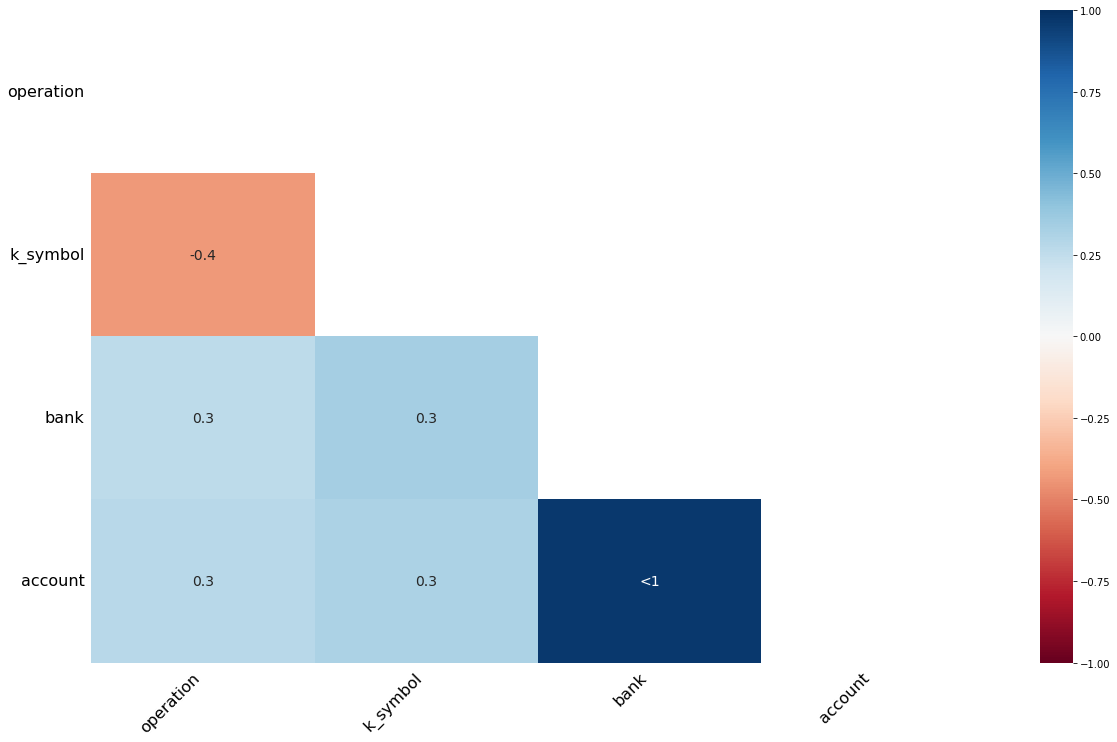

In [ ]:
msno.heatmap(trans_dev)

# Info Retrieved
Whenever the account field is missing, the bank field is also missing
Whenever the k_symbol field is missing, the operation field is not missing

In [ ]:
trans_dev['operation'].unique()

array(['credit in cash', 'collection from another bank', nan,
       'withdrawal in cash', 'remittance to another bank',
       'credit card withdrawal'], dtype=object)

In [ ]:
trans_dev['k_symbol'].unique()

array([nan, 'interest credited', ' ', 'household',
       'payment for statement', 'insurrance payment',
       'sanction interest if negative balance', 'old-age pension'],
      dtype=object)

<AxesSubplot:>

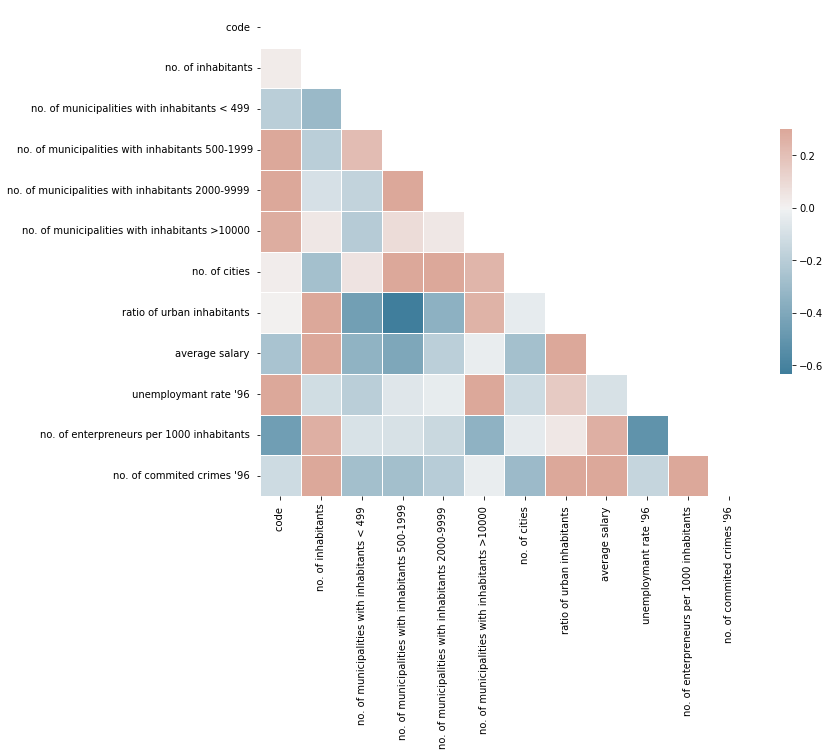

In [ ]:
# Compute the correlation matrix
corr = districts.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

<AxesSubplot:>

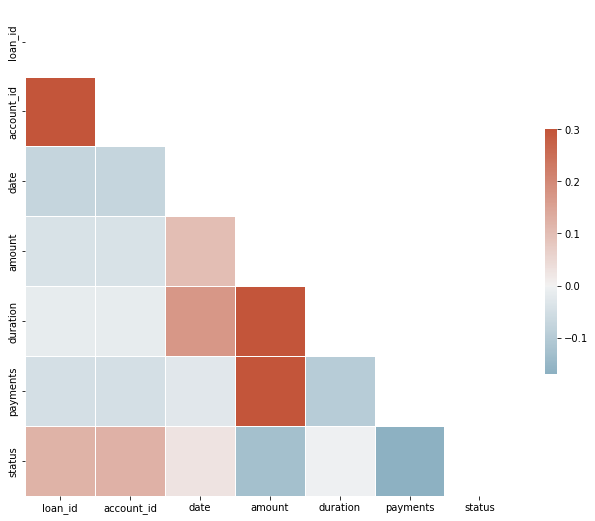

In [ ]:
# Compute the correlation matrix
corr = loans_dev.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

<AxesSubplot:>

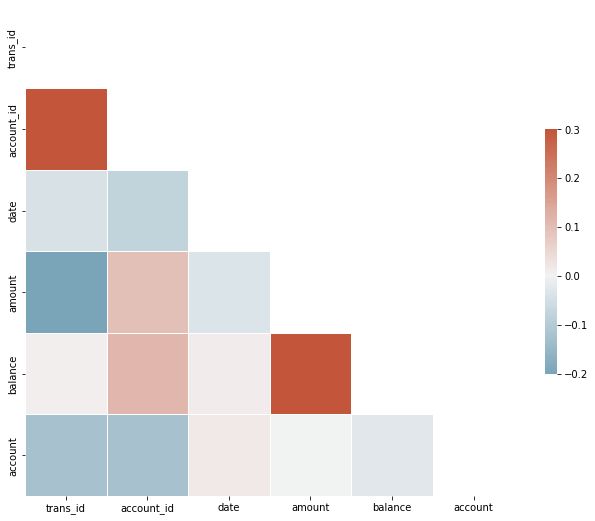

In [ ]:
# Compute the correlation matrix
corr = trans_dev.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [32]:

for df in accounts, cards_dev, disp, districts, loans_dev, trans_dev:
    df = df[df.columns.drop(list(df.filter(regex='_id')))]
    sns.pairplot(df)

AttributeError: 'str' object has no attribute 'columns'